In [ ]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

import json
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Number.zip

Streaming output truncated to the last 5000 lines.
 extracting: Number/IM_Train/train/8/7753.1.png  
 extracting: Number/IM_Train/train/8/776.1.png  
 extracting: Number/IM_Train/train/8/7762.2.png  
 extracting: Number/IM_Train/train/8/7765.1.png  
 extracting: Number/IM_Train/train/8/7768.0.png  
 extracting: Number/IM_Train/train/8/7770.1.png  
 extracting: Number/IM_Train/train/8/7791.1.png  
 extracting: Number/IM_Train/train/8/78.2.png  
 extracting: Number/IM_Train/train/8/7816.1.png  
 extracting: Number/IM_Train/train/8/7819.3.png  
 extracting: Number/IM_Train/train/8/7820.1.png  
 extracting: Number/IM_Train/train/8/7825.1.png  
 extracting: Number/IM_Train/train/8/7827.2.png  
 extracting: Number/IM_Train/train/8/7828.0.png  
 extracting: Number/IM_Train/train/8/7832.0.png  
 extracting: Number/IM_Train/train/8/7832.1.png  
 extracting: Number/IM_Train/train/8/7833.1.png  
 extracting: Number/IM_Train/train/8/7838.1.png  
 extracting: Number/IM_Train/train/8/7840.0.png  
 e

Clean Data (It is not used because the data has been overly cleaned.It is not used because the data has been overly cleaned.)

In [ ]:
# import cv2 
# import pytesseract
# import os


# f_path =  r"E:\SuperAi\Number\IM_Train\train\7"
# path = r"E:\SuperAi\Number\IM_Train\train\0\506.2.png"

# pytesseract.pytesseract.tesseract_cmd = "C:\Program Files\Tesseract-OCR/tesseract.exe"


# # img = cv2.imread(path)
# # img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# # img = cv2.resize(img,(64,64))
# # digit = pytesseract.image_to_string(img,lang='eng', config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
# # print(digit[0])

# # cv2.imshow('re',img)
# # cv2.waitKey(0)

# img = cv2.imread(f_path)
# count = 0
# digit_img = []
# def load_images_from_folder(folder,count):
    
#     for filename in os.listdir(folder):
#         count = count +1
#         img = cv2.imread(os.path.join(folder,filename))
#         img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#         img = cv2.resize(img,(64,64))
#         digit = pytesseract.image_to_string(img,lang='eng', config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
#         try :
#             if digit[0] == '7':
#                 digit_img.append(digit[0])
#         except:
#             pass
#         if count %50 == 0:
#             print(f'Process : {count}')
#             print(len(digit_img))

        
#     return digit

# load_images_from_folder(f_path,count)
# print(digit_img)
# print(f'len : {digit_img}')

Get Data

In [ ]:
current_dir = '/content/Number'
data = os.listdir(current_dir+r'/IM_Train/train' )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(current_dir+r'/IM_Train/train' +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(current_dir+r'/IM_Train/train' +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)
    print(f'{i} : done')

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

0 : done
1 : done
2 : done
3 : done
4 : done
5 : done
6 : done
7 : done
8 : done
9 : done
Total Dataponits =  73018


In [ ]:
data_y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.1)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.1)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (59144, 32, 32, 3)
Validation Set Shape =  (6572, 32, 32, 3)
Test Set Shape =  (7302, 32, 32, 3)


Pre_processing

In [ ]:
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))


In [ ]:
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

In [ ]:
valid_X.shape

(6572, 32, 32, 1)

In [ ]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [ ]:
#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,zoom_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [16]:
def prepare_data(img_input):
    img_input = cv2.resize(img_input,(32,32))
    img_input = np.array(img_input)

    img_input = cv2.cvtColor(img_input,cv2.COLOR_BGR2GRAY) #making image grayscale
    img_input = cv2.equalizeHist(img_input) #Histogram equalization to enhance contrast
    img_input = img_input/255 #normalizing

    # train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
    img_input = img_input.reshape(1,32,32,1)
    return img_input


Training

In [ ]:
model = Sequential()

model.add((Conv2D(64,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(64, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add((Conv2D(32, (3,3),padding="same", activation='relu')))
model.add((Conv2D(32, (3,3), padding="same", activation='relu')))

model.add((Conv2D(16, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        4624      
                                                        

In [ ]:
#Compiling the model

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model

history = model.fit(datagen.flow(train_X, train_y, batch_size=64),
                              epochs = 100, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/100
200/200 - 19s - loss: 1.8643 - accuracy: 0.3524 - val_loss: 0.9916 - val_accuracy: 0.6894 - 19s/epoch - 94ms/step
Epoch 2/100
200/200 - 6s - loss: 1.1078 - accuracy: 0.6444 - val_loss: 0.6880 - val_accuracy: 0.7839 - 6s/epoch - 29ms/step
Epoch 3/100
200/200 - 6s - loss: 0.8755 - accuracy: 0.7188 - val_loss: 0.5700 - val_accuracy: 0.8188 - 6s/epoch - 32ms/step
Epoch 4/100
200/200 - 6s - loss: 0.7937 - accuracy: 0.7444 - val_loss: 0.6025 - val_accuracy: 0.8142 - 6s/epoch - 29ms/step
Epoch 5/100
200/200 - 6s - loss: 0.7210 - accuracy: 0.7738 - val_loss: 0.4931 - val_accuracy: 0.8471 - 6s/epoch - 29ms/step
Epoch 6/100
200/200 - 6s - loss: 0.6875 - accuracy: 0.7837 - val_loss: 0.5033 - val_accuracy: 0.8462 - 6s/epoch - 29ms/step
Epoch 7/100
200/200 - 6s - loss: 0.6505 - accuracy: 0.7929 - val_loss: 0.5023 - val_accuracy: 0.8428 - 6s/epoch - 32ms/step
Epoch 8/100
200/200 - 6s - loss: 0.6243 - accuracy: 0.8013 - val_loss: 0.4649 - val_accuracy: 0.8541 - 6s/epoch - 29ms/step
Epoch 

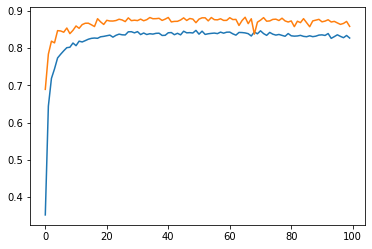

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Save & load model

In [ ]:
model.save('./content/Number/save_model/saved_model_3/sa3.h5')

In [ ]:
model = load_model('/content/Number/save_model/saved_model_3/sa3.h5')

Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        4624      
                                                        

Crop_test_data


In [ ]:
current_dir = os.getcwd()

img_folder = os.listdir(current_dir+'\IM_Test\IM_Test')

json_files = current_dir+r'\IM_Test\IM_Test.json'

if not os.path.exists('out'):
    os.makedirs('out')

if not os.path.exists('saved'):
    os.makedirs('saved')

f= json_files
print('trying to read:',f)
fl = open(f,'r')
data = json.load(fl)

for i in range(len(img_folder)):
	for j in range(len(data[i]['bboxes'])):
		boxes = data[i]['bboxes'][j]
		coor = list(boxes.values())
		coor.pop(0)
		img = Image.open(f"E:\SuperAi\\Number\IM_Test\IM_Test\\{i+1}.png")
		img2 = img.crop((coor[0],coor[2],coor[1],coor[3]))
		img2.save(f'E:\SuperAi\\Number\IM_Test\New Folder\IM_Test_crop\\{i+1}_{j}.png')
		if i % 100 ==0:
			print(f'{i} cropped')

Test Prediction

In [19]:
all_result = []
test_folder = os.listdir('/content/Number/IM_Test/New folder/IM_Test_crop')
test_folder.sort(key=lambda f: int(''. join(filter(str. isdigit, f))))
img_input = cv2.imread('/content/Number/IM_Test/New folder/IM_Test_crop/'+str(i))
for i in test_folder:
    img_input = cv2.imread('/content/Number/IM_Test/New folder/IM_Test_crop/'+str(i))
    img_input = prepare_data(img_input)
    predictions = model.predict(img_input)
    result = np.argmax(predictions,axis=1)
    all_result.append(result[0])
    if len(all_result) % 100 ==0:
        print(f'Predicting done : {len(all_result)}')
all_result[:100]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step
Predicting done : 21100
1/1 [==============================] - 0s 23ms/step
Predicting done : 21200
1/1 [==============================] - 0s 23ms/step
Predicting done : 21300
1/1 [==============================] - 0s 38ms/step
Predicting done : 21400
1/1 [==============================] - 0s 31ms/step
Predicting done : 21500
1/1 [==============================] - 0s 28ms/step
Predicting done : 21600
1/1 [==============================] - 0s 22ms/step
Predicting done : 21700
1/1 [==============================] - 0s 21ms/step
Predicting done : 21800
1/1 [==============================] - 0s 20ms/step
Predicting done : 21900
1/1 [==============================] - 0s 25ms/step
Predicting done : 22000
1/1 [==============================] - 0s 20ms/step
Predicting done : 22100
1/1 [==============================] - 0s 20ms/step
Predicting done : 22200
1/1 [==============================] 

[5,
 2,
 1,
 0,
 6,
 0,
 9,
 1,
 1,
 8,
 3,
 6,
 5,
 1,
 4,
 1,
 1,
 6,
 3,
 4,
 2,
 0,
 1,
 9,
 2,
 5,
 4,
 1,
 4,
 2,
 9,
 3,
 5,
 6,
 0,
 1,
 5,
 1,
 1,
 2,
 0,
 1,
 6,
 9,
 2,
 6,
 1,
 2,
 0,
 6,
 9,
 1,
 5,
 1,
 9,
 2,
 1,
 5,
 1,
 5,
 2,
 9,
 2,
 1,
 1,
 0,
 6,
 9,
 3,
 2,
 3,
 5,
 1,
 1,
 4,
 6,
 2,
 6,
 3,
 1,
 4,
 1,
 7,
 1,
 2,
 1,
 7,
 1,
 0,
 1,
 4,
 4,
 6,
 4,
 4,
 2,
 2,
 1,
 7,
 7]

**********************

In [ ]:
#test by folder
img_folder = '/content/Number/IM_Test/New folder/'
img_generator = tf.keras.preprocessing.image_dataset_from_directory(
    img_folder,
    color_mode='grayscale',
    image_size=(32,32),
    shuffle=False
)

prob = model.predict(prepare_data(img_generator),2000)

In [ ]:
predict_2 = model.predict(img_generator,2000)
predict_2_class = np.argmax(predict_2,axis=1)

814/814 [==============================] - 8s 10ms/step


In [ ]:
predict_2_class

array([1, 3, 3, ..., 3, 7, 3])

Save result to CSV

In [22]:
test_raw = pd.read_csv('/content/Number/IM_Submit.csv')
test_raw['class']=all_result
test_raw
test_raw.to_csv('/content/Number/IM_Submit_2.csv',index=False)